## 선형회귀(Linear Regression) - 심화

#### Linear Regression을 활용하여 섭씨온도(C, Celsius)를 화씨온도(F, Fahrenheit)로 변환해주는 공식을 만들수 있다. 
섭씨온도과 화씨온도의 관계는 앞에서 우리가 살펴보았던 선형회귀의 관계를 가지고 있다.
#### H(x) = aX + b 에서처럼, F = C*1.8 +32 
이때, 1.8과 32라는 값을 모르고 있다고 가정하고, 머신러닝 알고리즘을 이용해서 주어진 섭씨 온도와 화씨온도 데이타 만으로 이 값들을 찾아내는 실습을 진행해보도록 하겠다.
Chain Rule 증명 ----> 구글 검색 하면 여기에 사용되는 증명 공식들,,미분, 편미분..공식들이 나온다.참조바람

### Configuration (or prerequisite)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Generate Dataset

#### 선형회귀 문제를 다루기 위한 학습용 데이타셋을 생성
0도에서 100도 사이의 값을 갖는 섭씨온도 데이타를 100개 만들어보자
이 데이타가 해당 머신러닝 알고리즘에서 사실상 Feature가 될 것이다.

### 섭씨온도 데이타에 상응하는 화씨온도를 생성
#### 우리가 알고있던 기존의 섭씨-화씨변환 공식을 적용해서 위 섭씨온도 데이타에 대응하는 화씨온도 데이타를 생성. 
이 데이타가 오늘 다룰 학습 모델 알고리즘의 Label이 될 것이다.

### Bias (편향 찾기) -- Weight는 1.8

#### Weight는 1.8로 주고 Bias를 직관적으로 한번 찾아보겠다.

In [3]:
C = np.random.randint(low=1, high=101, size=100)
C

array([ 97,  99,  21,  84,  50,  15,  57,  58,  48,  30,  45,  26,  88,
        87,  39,  99,  67,  58,  63,  31,  40,  43,  67,  79,  41,  90,
        60,  19,  50,  46,  27,  97,  93,  95,  53,  30,  75,  76,  88,
        10,  41,   5,  31,  58,   3,  22,  66,  11,  92,  19,  21,  40,
        27, 100,  52,  23, 100,  34,  84,  20,  34,  75,   7,   7,  68,
        11,  75,  75,  57,  41,   8,  71,  87,  96,  68,  69,  51,  86,
        42,  94,  76,   4,  54,  98,  69,  75,  26,  38,   6,  11,  49,
        79,  28,  42,  12,  54,  84,   9,  53,  57])

In [6]:
print(C.shape)
C[:10]

(100,)


array([97, 99, 21, 84, 50, 15, 57, 58, 48, 30])

#### 섭씨온도에 상응하는 화씨온도를 생성
    우리가 알고있는 기존의 섭씨-화씨 변환공식을 적용하기 위해서 화씨 온도를 생성
    이 데이타가 오늘 다룰 학습모델의 라벨이 된다

In [7]:
F = C * 1.8 + 32
F

array([206.6, 210.2,  69.8, 183.2, 122. ,  59. , 134.6, 136.4, 118.4,
        86. , 113. ,  78.8, 190.4, 188.6, 102.2, 210.2, 152.6, 136.4,
       145.4,  87.8, 104. , 109.4, 152.6, 174.2, 105.8, 194. , 140. ,
        66.2, 122. , 114.8,  80.6, 206.6, 199.4, 203. , 127.4,  86. ,
       167. , 168.8, 190.4,  50. , 105.8,  41. ,  87.8, 136.4,  37.4,
        71.6, 150.8,  51.8, 197.6,  66.2,  69.8, 104. ,  80.6, 212. ,
       125.6,  73.4, 212. ,  93.2, 183.2,  68. ,  93.2, 167. ,  44.6,
        44.6, 154.4,  51.8, 167. , 167. , 134.6, 105.8,  46.4, 159.8,
       188.6, 204.8, 154.4, 156.2, 123.8, 186.8, 107.6, 201.2, 168.8,
        39.2, 129.2, 208.4, 156.2, 167. ,  78.8, 100.4,  42.8,  51.8,
       120.2, 174.2,  82.4, 107.6,  53.6, 129.2, 183.2,  48.2, 127.4,
       134.6])

In [8]:
print(F.shape)
F[:10]

(100,)


array([206.6, 210.2,  69.8, 183.2, 122. ,  59. , 134.6, 136.4, 118.4,
        86. ])

### Visualization
    위에서 우리가 만든 Feature와 Label을 직관적으로 확인할 수 있는 선형을 일단 그려놓자

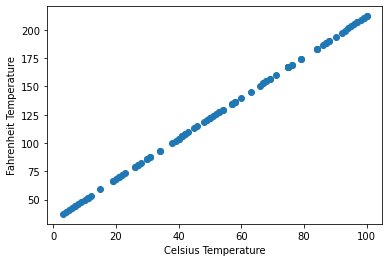

In [9]:
plt.scatter(C, F)
plt.xlabel('Celsius Temperature')
plt.ylabel('Fahrenheit Temperature')
plt.show()

### Bias(편향찾기) -- Weight는 1.8

In [32]:
X = C
y = F # 라벨이라서 소문자 표시...

In [35]:
w = 1.8 # 이 값은 고정
b = np.random.uniform(low=-1.0, high=+1.0)

w, b

(1.8, -0.32706728284132747)

In [36]:
y_predict = w * X + b
y_predict[:10]

array([174.27293272, 177.87293272,  37.47293272, 150.87293272,
        89.67293272,  26.67293272, 102.27293272, 104.07293272,
        86.07293272,  53.67293272])

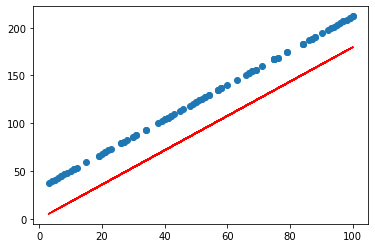

In [38]:
plt.scatter(C,F)
plt.plot(C, y_predict, c='r')
plt.show()

### Bias 보정

In [44]:
# b = b - (y_predict - y).mean() #mean안해주면 동일한 값이 100개 나온다..
b -= (y_predict - y).mean()
b

32.0

#### 새로운 예측

In [45]:
y_predict = w * X + b
y_predict[:10]

array([206.6, 210.2,  69.8, 183.2, 122. ,  59. , 134.6, 136.4, 118.4,
        86. ])

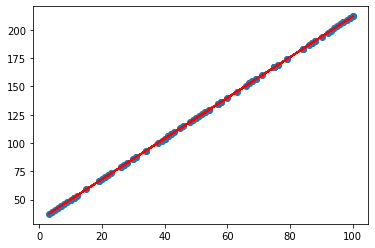

In [46]:
plt.scatter(C,F)
plt.plot(C, y_predict, c='r')
plt.show()

### 정규분포에 해당하는 weight, bias값을 랜덤하게 초기화
    실제값과 예측한 결과값 사이에 오차가 발생할 것이다.
    오차를 줄여가야한다...Loss Function이 0에 가가워지도록 학습을 진행해야한다.

In [54]:
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)
w, b

(0.8180941343887658, -0.25540532966450535)

In [55]:
y_predict = w * X + b
y_predict[:10]

array([79.09972571, 80.73591397, 16.92457149, 68.46450196, 40.64930139,
       12.01600669, 46.37596033, 47.19405446, 39.01311312, 24.2874187 ])

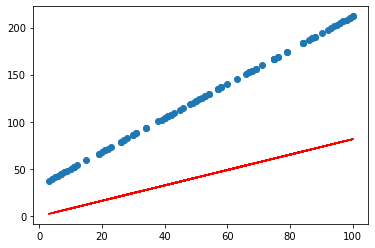

In [56]:
plt.scatter(C,F)
plt.plot(C, y_predict, c='r')
plt.show()

### Gradient Descent

### 가중치(Weight, W), 편향(Bias, B) 찾기
#### 이제 경사하강법(Gradient Descent)을 사용하여 섭씨온도를 화씨온도로 변환해줄 주 있는 공식을 찾아보겠다.
공식의 세부내용은 모른다치고, 두 변수(X,y)가 선형(Linear)과 관계있음을 가정(y=X * w + b)하여 가중치(weight)와 편차(bias)를 정의해 둔다. 그리고 경사하강법을 이용해서 선형회귀를 학습시킨다.
학습이 완료되면, 얻어진 최적의 가중치와 편차로 섭씨온도를 화씨온도로 변환해주는 공식을 만들어 줄수 있다.
학습은 모든 epoch이 끝날 때까지 반복할 수도 있지만, 여기선 오차(error)가 0.1 이하가 되면 학습을 종료하도록 한다.

In [63]:
num_epoch = 100000 # 학습 횟수
'''
이 값이 작을수록 더욱 w, b값이 미세하게 조정
학습하는 시간이 더 오래걸린다...더 최적의 값을 찾을수 있다.
'''
learning_rate = 0.0003 
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = w * X + b
    
    # 현재 오차를 구한다.
    error = np.abs(y_predict - y).mean()
    
    if error < 0.1:
        break
        
    # Backpropagation..? (이건 어떻게 해야할지)
    # w, b값을 보정해 나간다...미분, 편미분.
    ## learning_rate * 9 ((y_predict-y) * X).mean()
    w = w-learning_rate * ((y_predict - y) * X).mean()
    b = b-learning_rate * (y_predict - y).mean()
    
    # 10000회마다 epoch,w,b,error(loss)를 출력해서 점점값들이 어떤 양상을...
    if epoch % 10000 == 0:
        print(f'{epoch:5} w={w:.3f}, b={b:.3f}, error={error:.3f}')
print('---'*30)
print(f'{epoch:5} w={w:.3f}, b={b:}, error={error:.3f}')

    0 w=2.380, b=-0.454, error=83.185
10000 w=2.037, b=15.841, error=6.508
20000 w=1.918, b=23.955, error=3.240
30000 w=1.859, b=27.994, error=1.613
40000 w=1.829, b=30.006, error=0.803
50000 w=1.815, b=31.007, error=0.400
60000 w=1.807, b=31.506, error=0.199
------------------------------------------------------------------------------------------
69877 w=1.804, b=31.75170289385801, error=0.100


### Predict

In [65]:
y_predict = w * C + b
y_predict[:10]

array([206.70476419, 210.31204381,  69.62813885, 183.2574467 ,
       121.93369325,  58.8063    , 134.55917191, 136.36281171,
       118.32641364,  85.86089711])

### Visualization

In [66]:
result = pd.DataFrame({'C': C, 'F': F, 'F(predict)':y_predict})
result.head(10)

,C,F,F(predict)
0,97,206.6,206.704764
1,99,210.2,210.312044
2,21,69.8,69.628139
3,84,183.2,183.257447
4,50,122.0,121.933693
5,15,59.0,58.806300
6,57,134.6,134.559172
7,58,136.4,136.362812
8,48,118.4,118.326414
9,30,86.0,85.860897


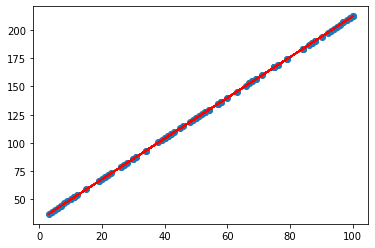

In [68]:
plt.scatter(C, F)
plt.plot(C, y_predict, c='r')

#### 선형 회귀의 학습이 끝났으면, 이제 이 머신러닝 알고리즘을 활용하여 변환공식을 완성하고, 주어진 섭씨온도를 화씨온도로 변환(혹은 섭씨온도로 화씨온도를 예측)할 수 있습니다. 앞서 만들어준 데이터를 그대로 활용하여 주어진 섭씨온도(C)로 화씨온도를 예측해보겠습니다.